In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import the data and display the first 5 rows
df = pd.read_csv("../data/raw/Walmart_Sales.csv")

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
# Get info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
# Get the describtive stats of the data
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
# Question 1: Which store has the highest average profits over one week
# Set the Seaborn theme
sns.set_theme(style="darkgrid")

# Calculate average Weekly_Sales per store
store_avg_sales = df.groupby("Store")["Weekly_Sales"].mean().reset_index()

# Get top 5 stores (highest average Weekly_Sales)
top_5_stores = store_avg_sales.nlargest(5, "Weekly_Sales")

# Get bottom 5 stores (lowest average Weekly_Sales)
bottom_5_stores = store_avg_sales.nsmallest(5, "Weekly_Sales")

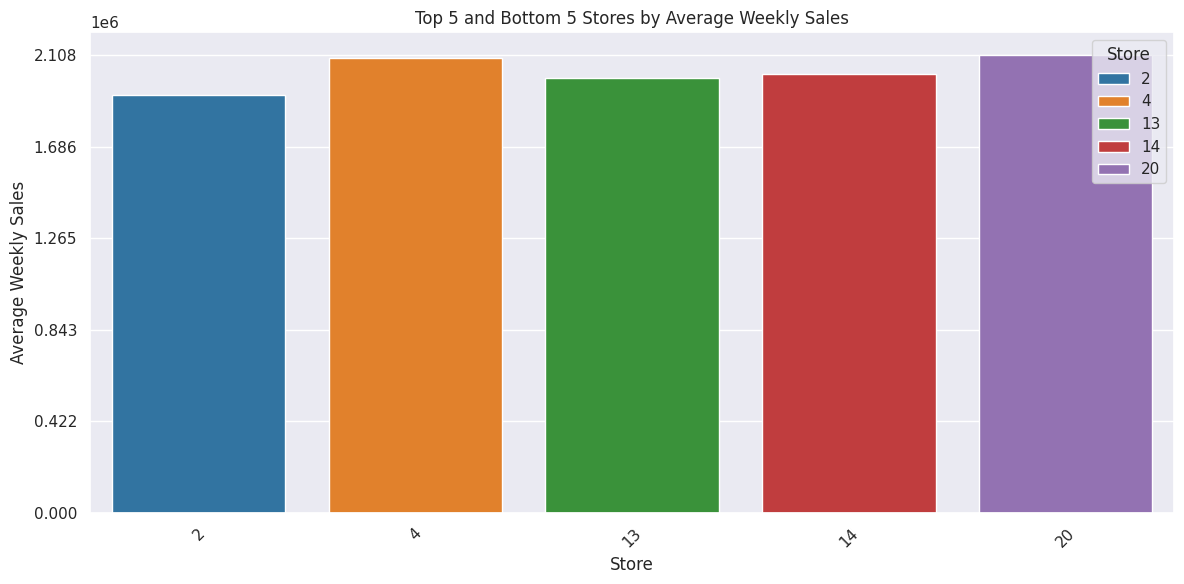

In [7]:
plt.figure(figsize=(12, 6))  # Set figure size for readability
sns.barplot(data=top_5_stores, x="Store", y="Weekly_Sales", hue="Store", palette="tab10")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Customize y-axis tick spacing
max_sales = top_5_stores["Weekly_Sales"].max()
y_ticks = np.arange(0, max_sales + 1, step=max_sales // 5)  # Adjust step for ~5 ticks
plt.yticks(y_ticks)

# Add title and labels
plt.title("Top 5 and Bottom 5 Stores by Average Weekly Sales")
plt.xlabel("Store")
plt.ylabel("Average Weekly Sales")

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Save the plot
plt.savefig("../figures/max_avg_weekly_sales_stores.png")

# Show the plot
plt.show()

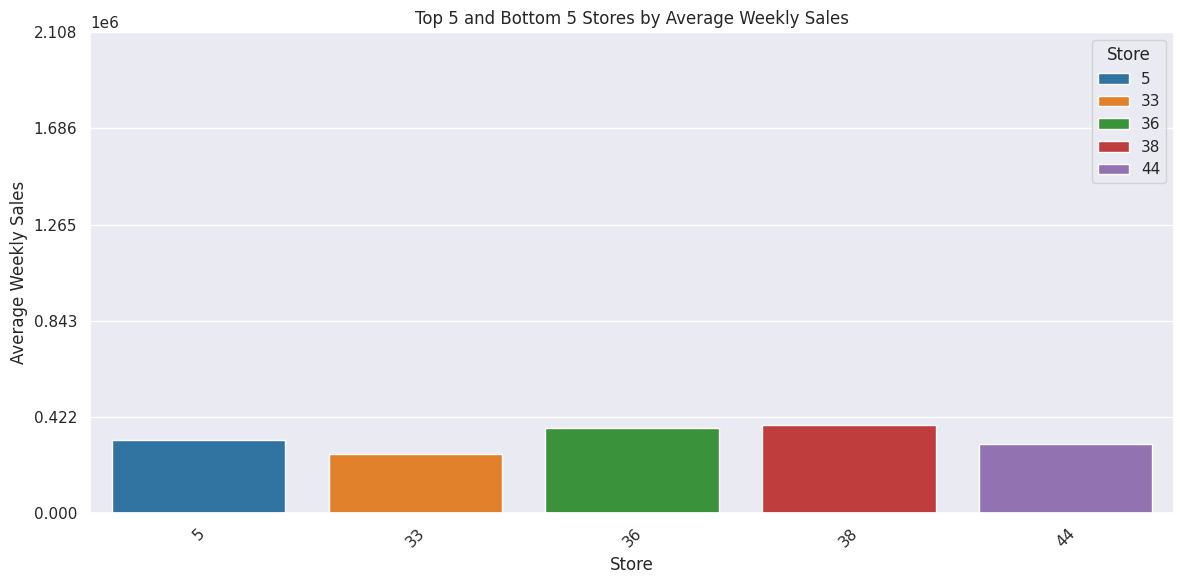

In [8]:
plt.figure(figsize=(12, 6))  # Set figure size for readability
sns.barplot(data=bottom_5_stores, x="Store", y="Weekly_Sales", hue="Store", palette="tab10")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Customize y-axis tick spacing
y_ticks = np.arange(0, max_sales + 1, step=max_sales // 5)  # Adjust step for ~5 ticks
plt.yticks(y_ticks)

# Add title and labels
plt.title("Top 5 and Bottom 5 Stores by Average Weekly Sales")
plt.xlabel("Store")
plt.ylabel("Average Weekly Sales")

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Save the plot
plt.savefig("../figures/min_avg_weekly_sales_stores.png")

# Show the plot
plt.show()

In [9]:
# Interesting question, Question 2: what is the most frequent weather for each of the ten stores
# We can get the mean, max, and min of the temp grouped by the store

# Now we need to get the mean, max, and min temp for each store
top_5_temp_df = df[df['Store'].isin(top_5_stores['Store'].unique())].groupby('Store')['Temperature'].agg(['mean', 'min', 'max']).reset_index()

top_5_temp_df.columns = ['Store', 'mean_temp', 'min_temp', 'max_temp']

top_5_temp_df

,Store,mean_temp,min_temp,max_temp
0,2,68.216364,33.02,93.34
1,4,62.253357,28.84,86.09
2,13,53.697133,16.94,83.68
3,14,57.790979,24.05,82.99
4,20,55.451399,20.39,79.20


In [10]:
bottom_5_temp_df = df[df['Store'].isin(bottom_5_stores['Store'].unique())].groupby('Store')['Temperature'].agg(['mean', 'min', 'max']).reset_index()

bottom_5_temp_df.columns = ['Store', 'mean_temp', 'min_temp', 'max_temp']

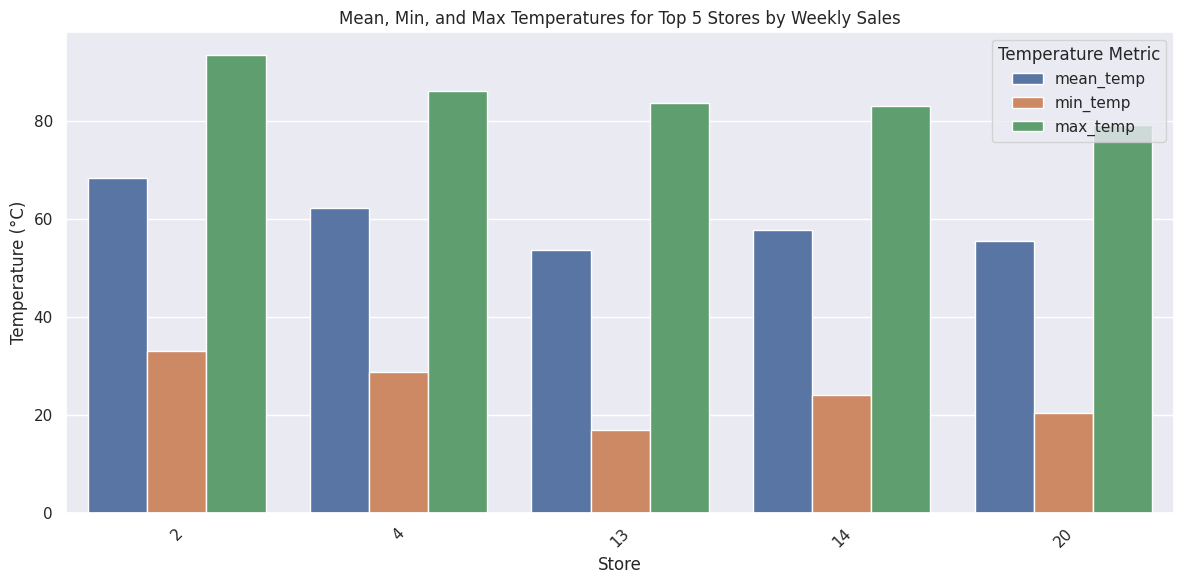

In [11]:
temp_df_melted = pd.melt(top_5_temp_df, id_vars=['Store'], value_vars=['mean_temp', 'min_temp', 'max_temp'], 
                         var_name='Metric', value_name='Temperature')

plt.figure(figsize=(12, 6))
sns.barplot(data=temp_df_melted, x='Store', y='Temperature', hue='Metric')

plt.title('Mean, Min, and Max Temperatures for Top 5 Stores by Weekly Sales')
plt.xlabel('Store')
plt.ylabel('Temperature (°C)')
plt.legend(title='Temperature Metric')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('../figures/temperature_stats_by_top_stores.png')

plt.show()

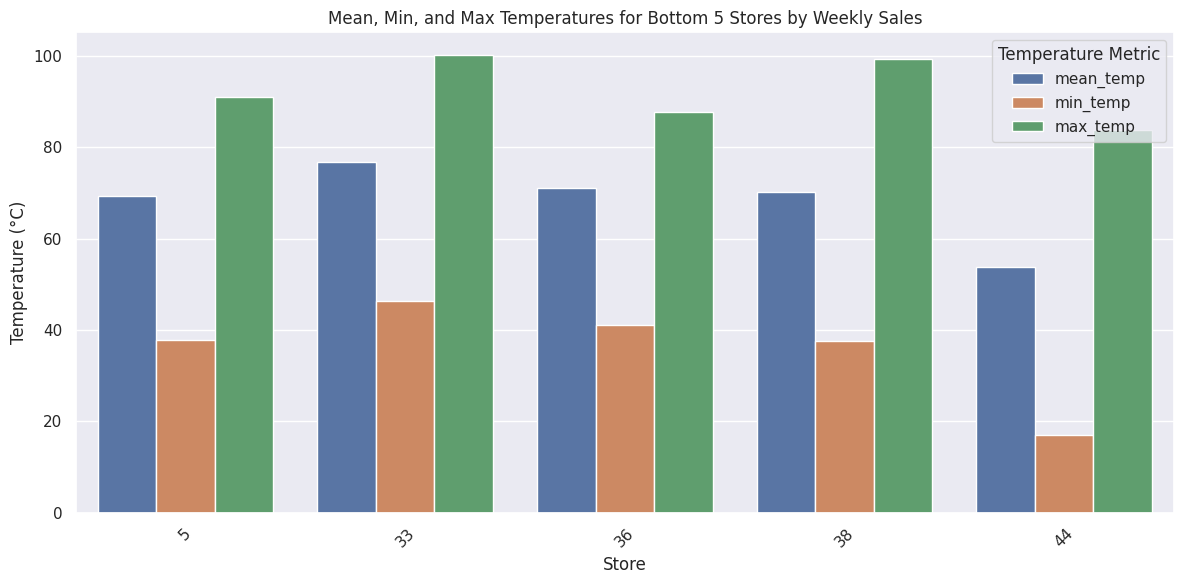

In [12]:
temp_df_melted = pd.melt(bottom_5_temp_df, id_vars=['Store'], value_vars=['mean_temp', 'min_temp', 'max_temp'], 
                         var_name='Metric', value_name='Temperature')

plt.figure(figsize=(12, 6))
sns.barplot(data=temp_df_melted, x='Store', y='Temperature', hue='Metric')

plt.title('Mean, Min, and Max Temperatures for Bottom 5 Stores by Weekly Sales')
plt.xlabel('Store')
plt.ylabel('Temperature (°C)')
plt.legend(title='Temperature Metric')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('../figures/temperature_stats_by_bottom_stores.png')

plt.show()

In [13]:
# Maybe the lower temperature the more sales
# Question 3: Which is the best time for selling (holiday or not)?
data = df.groupby('Holiday_Flag')['Weekly_Sales'].mean().reset_index()

data.columns = ['Holiday_Flag', 'Sales']

data.head()

,Holiday_Flag,Sales
0,0,1.041256e+06
1,1,1.122888e+06


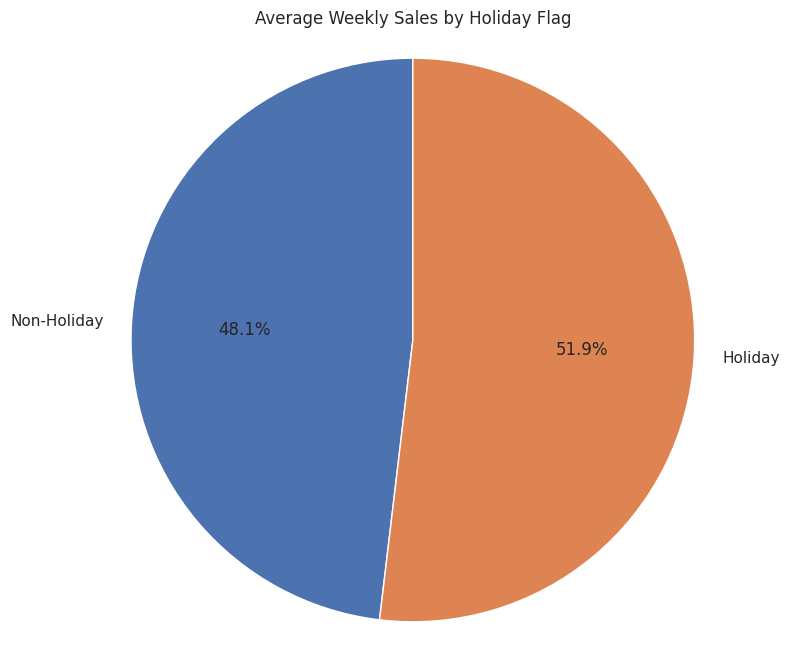

In [14]:
plt.figure(figsize=(8, 8))
plt.pie(data['Sales'], labels=data['Holiday_Flag'].map({0: 'Non-Holiday', 1: 'Holiday'}), autopct='%1.1f%%', startangle=90)
plt.title('Average Weekly Sales by Holiday Flag')
plt.axis('equal')


plt.savefig('../figures/average_weekly_sales_comparsion_holidays.png')

plt.show()

In [15]:
# So we now understand that there is no big difference in sales in holiday
# This is great is the imbalance in this feature will cause problems if we tried to predict something with it with machine learning model
# Question 4: which months in the year sales go well and which is not?

# First we need to get a month column so we can get the average sales per month
df['month'] = df['Date'].str[3:5].astype(int)

df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,3
...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,9
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,10
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,10
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,10


In [16]:
# Now we need to get the average sales per month
average_sales_per_month = df.groupby("month")['Weekly_Sales'].mean().reset_index()

average_sales_per_month

,month,Weekly_Sales
0,1,9.238846e+05
1,2,1.053200e+06
2,3,1.013309e+06
3,4,1.026762e+06
4,5,1.031714e+06
5,6,1.064325e+06
6,7,1.031748e+06
7,8,1.048017e+06
8,9,9.893353e+05
9,10,9.996321e+05


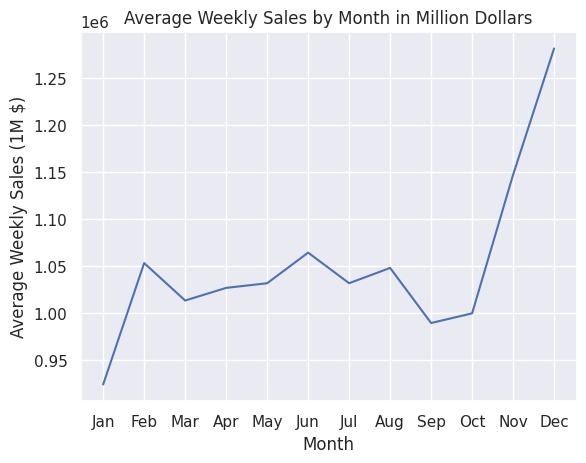

In [17]:
# Now we plot the results as a line chart
sns.lineplot(data=average_sales_per_month, x="month", y="Weekly_Sales")

# Set x-ticks to show all 12 months
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Add title and labels
plt.title('Average Weekly Sales by Month in Million Dollars')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales (1M $)')

plt.savefig('../figures/average_weekly_sales_by_month.png')

# Show plot
plt.show()

In [18]:
# So we can see that months can make difference in the sales
# Quesion 5: Which weeks at each months we get more sales?

# First we need to get a new feature for the week

# So we get the dates
df['day'] = df['Date'].str[0:2].astype(int)

df['day'].unique()

array([ 5, 12, 19, 26,  2,  9, 16, 23, 30,  7, 14, 21, 28,  4, 11, 18, 25,
        6, 13, 20, 27,  3, 10, 17, 24,  1,  8, 15, 22, 29, 31])

In [19]:
# Now we map each 5 to 1, 12 to 2, 19 to 3 and 26 or 28 to 4
def day_to_week(day):
    if 1 <= day <= 7:
        return 1
    elif 8 <= day <= 14:
        return 2
    elif 15 <= day <= 21:
        return 3
    elif 22 <= day <= 28:
        return 4
    else:
        return 5

df['week'] = df['day'].apply(day_to_week)

df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,day,week
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,1
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2,19,3
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2,26,4
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,1
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,9,28,4
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,10,5,1
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,10,19,3


In [20]:
# Now we can get the average sales for each week and do a pie chart so we can get an insight
avg_sale_per_week = df.groupby('week')['Weekly_Sales'].mean().reset_index()

avg_sale_per_week

,week,Weekly_Sales
0,1,1.057685e+06
1,2,1.043217e+06
2,3,1.036588e+06
3,4,1.071511e+06
4,5,9.835395e+05


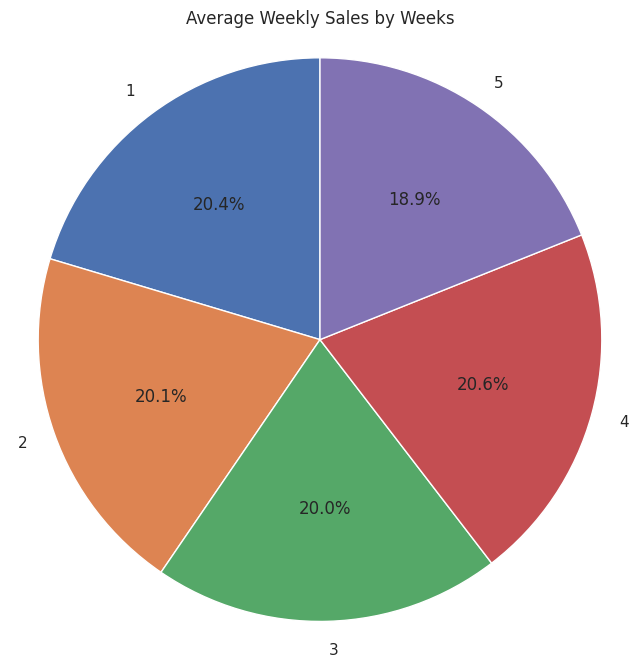

In [21]:
# Now we can do a pie chart that returns the percentage of sales in each week
plt.figure(figsize=(8, 8))
plt.pie(avg_sale_per_week['Weekly_Sales'], labels=avg_sale_per_week['week'], autopct='%1.1f%%', startangle=90)
plt.title('Average Weekly Sales by Weeks')
plt.axis('equal')


plt.savefig('../figures/average_weekly_sales_comparsion_weeks.png')

plt.show()

In [22]:
# Now we know that the 5th week has a drop and sales.
# Question 6: How the sales differs in years?

# Frist get a year column
df['year'] = df['Date'].str[6:].astype(int)

df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,day,week,year
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,1,2010
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2,2010
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,2,19,3,2010
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,2,26,4,2010
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,9,28,4,2012
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,10,5,1,2012
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2,2012
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,10,19,3,2012


In [23]:
# Now we need to get the sales for each year
total_sales_per_year = df.groupby('year')['Weekly_Sales'].sum().reset_index()

total_sales_per_year

,year,Weekly_Sales
0,2010,2.288886e+09
1,2011,2.448200e+09
2,2012,2.000133e+09


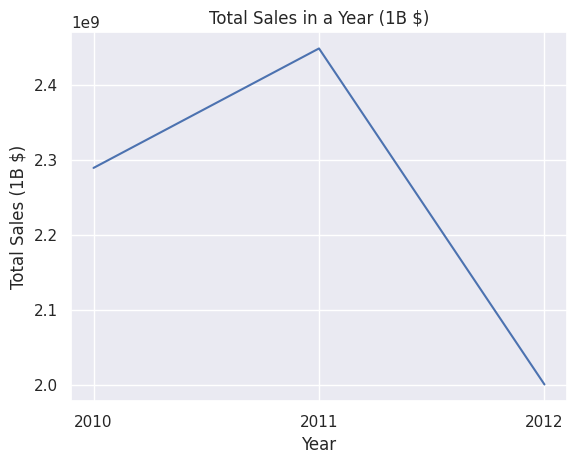

In [24]:
sns.lineplot(data=total_sales_per_year, x="year", y="Weekly_Sales")
plt.xticks(ticks=[2010, 2011, 2012], labels=['2010', '2011', '2012'])

# Add title and labels
plt.title('Total Sales in a Year (1B $)')
plt.xlabel('Year')
plt.ylabel('Total Sales (1B $)')

plt.savefig('../figures/total_sales_per_year.png')

# Show plot
plt.show()

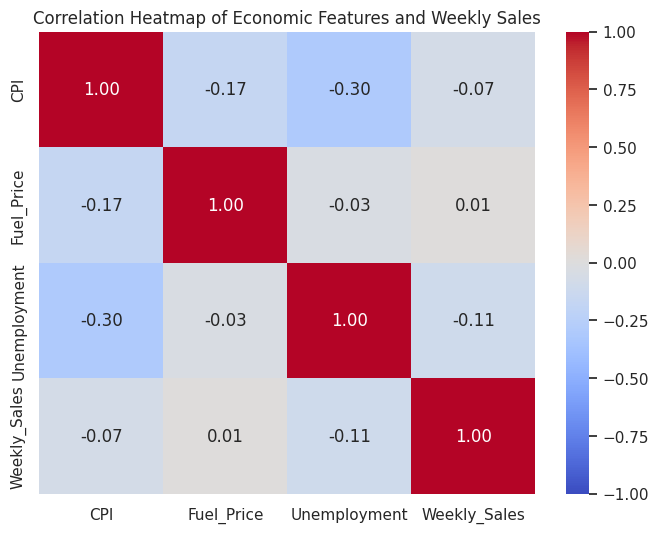

In [25]:
# So we now konw that the profits has gone down in the last year
# Question 6: How much does CPI, Feul_Price, Unemployment affect the revenue
features = ['CPI', 'Fuel_Price', 'Unemployment', 'Weekly_Sales']

# Compute correlation matrix
corr_matrix = df[features].corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title('Correlation Heatmap of Economic Features and Weekly Sales')
plt.savefig('../figures/correlation_heatmap.png')
plt.show()

In [26]:
# We can see from this plot that fuel price have little to no effect on the weekly_sales, and week corr with unemployment and cpi
# Now we can see the p-value also for the cpi and unemployment if p-value >= 0.05 then it's not signficant and we can neglect it in the analysis
from scipy.stats import pearsonr
unemp_corr, unemp_p_value = pearsonr(df['Unemployment'], df['Weekly_Sales'])
print(f"Unemployment P-value: {unemp_p_value:.5f}")

cpi_corr, cpi_p_value = pearsonr(df['CPI'], df['Weekly_Sales'])
print(f"CPI P-value: {cpi_p_value:.5f}")

Unemployment P-value: 0.00000
CPI P-value: 0.00000
